<a href="https://colab.research.google.com/github/KORALLLL/MTUCI_EMNIST/blob/Nastya/lenet/NastyaReschOfSkipConnsAndDiffActFunc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Model




<table>
  <tr>
    <th>layer</th>
    <th>layer type2</th>
    <th>feature maps</th>
    <th>size</th>
    <th>kernel size</th>
    <th>stride</th>
    <th>padding</th>
    <th>activation</th>
  </tr>
  <tr>
    <th>input</th>
    <th>image</th>
    <th>1</th>
    <th>28*28</th>
    <th>-</th>
    <th>-</th>
    <th>-</th>
    <th>-</th>
  </tr>
  <tr>
    <th>1</th>
    <th>convoluation</th>
    <th>4</th>
    <th>28*28</th>
    <th>3*3</th>
    <th>1</th>
    <th>1</th>
    <th>relu</th>
  </tr>
  <tr>
    <th>2</th>
    <th>convoluation</th>
    <th>4</th>
    <th>28*28</th>
    <th>3*3</th>
    <th>1</th>
    <th>1</th>
    <th>relu</th>
  </tr>
  <tr>
    <th>3</th>
    <th>convoluation</th>
    <th>6</th>
    <th>28*28</th>
    <th>3*3</th>
    <th>1</th>
    <th>1</th>
    <th>relu</th>
  </tr>
  <tr>
    <th>4</th>
    <th>convoluation</th>
    <th>6</th>
    <th>28*28</th>
    <th>3*3</th>
    <th>1</th>
    <th>1</th>
    <th>relu</th>
  </tr>
  <tr>
    <th>5</th>
    <th>maximum pooling</th>
    <th>6</th>
    <th>14*14</th>
    <th>2*2</th>
    <th>2</th>
    <th>-</th>
    <th>relu</th>
  </tr>
  <tr>
    <th>6</th>
    <th>convoluation</th>
    <th>12</th>
    <th>12*12</th>
    <th>3*3</th>
    <th>1</th>
    <th>0</th>
    <th>relu</th>
  </tr>
  <tr>
    <th>7</th>
    <th>convoluation</th>
    <th>12</th>
    <th>12*12</th>
    <th>3*3</th>
    <th>1</th>
    <th>1</th>
    <th>relu</th>
  </tr>
  <tr>
    <th>8</th>
    <th>convoluation</th>
    <th>16</th>
    <th>10*10</th>
    <th>3*3</th>
    <th>1</th>
    <th>0</th>
    <th>relu</th>
  </tr>
  <tr>
    <th>9</th>
    <th>convoluation</th>
    <th>16</th>
    <th>10*10</th>
    <th>3*3</th>
    <th>1</th>
    <th>1</th>
    <th>relu</th>
  </tr>
  <tr>
    <th>10</th>
    <th>maximum pooling</th>
    <th>16</th>
    <th>5*5</th>
    <th>2*2</th>
    <th>2</th>
    <th>-</th>
    <th>relu</th>
  </tr>
  <tr>
    <th>11</th>
    <th>fully connected</th>
    <th>-</th>
    <th>120</th>
    <th>-</th>
    <th>-</th>
    <th>-</th>
    <th>relu</th>
  </tr>
  <tr>
    <th>12</th>
    <th>fully connected</th>
    <th>-</th>
    <th>84</th>
    <th>-</th>
    <th>-</th>
    <th>-</th>
    <th>relu</th>
  </tr>
  <tr>
    <th>output</th>
    <th>fully connected</th>
    <th>-</th>
    <th>35</th>
    <th>-</th>
    <th>-</th>
    <th>-</th>
    <th>-</th>
  </tr>
</table>

# Hyperparameters


train dataset: MNIST + EMNIST letters

test dataset: dataset of DreamTeam

training sample size: 36960 * 2

validation sample size: 30800

testing sample size: 16784

loss finction: Cross Entropy Loss

optimizer: RMSprop

learning rate: 0.001

batch size: 2640

epoch number: 500

# Module importation

In [1]:
import torch
import torchvision.datasets
import torchvision.transforms as transforms
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as bar
import pickle
import numpy as np
import scipy.stats as stats

# Git cloning

In [ ]:
!git clone https://github.com/KORALLLL/MTUCI_EMNIST.git

Cloning into 'MTUCI_EMNIST'...
remote: Enumerating objects: 36475, done.
remote: Counting objects: 100% (12835/12835), done.
remote: Compressing objects: 100% (12672/12672), done.
remote: Total 36475 (delta 176), reused 12796 (delta 156), pack-reused 23640
Receiving objects: 100% (36475/36475), 128.36 MiB | 27.50 MiB/s, done.
Resolving deltas: 100% (461/461), done.


# Dataset preparation

In [ ]:
emnist_train = torchvision.datasets.EMNIST('./', split='letters', download = True, train = True)
mnist_train = torchvision.datasets.EMNIST('./', split='mnist', download = True, train = True)

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

emnist_train_data = emnist_train.data
mnist_train_data = mnist_train.data
train_data = torch.cat([emnist_train_data[:24960], mnist_train_data[:12000]], dim=0).float().unsqueeze(1).to(device) / 255

temp_emnist_train_labels = emnist_train.targets[:24960]
emnist_train_labels = []

for i in range(len(temp_emnist_train_labels)):
  if temp_emnist_train_labels[i]==15:
    emnist_train_labels.append(torch.tensor(0))
  elif temp_emnist_train_labels[i]>15:
    emnist_train_labels.append(temp_emnist_train_labels[i]+8)
  else:
    emnist_train_labels.append(temp_emnist_train_labels[i]+9)

mnist_train_labels = mnist_train.targets
train_labels = torch.cat([torch.stack(emnist_train_labels[:24960]), mnist_train_labels[:12000]], dim=0).to(device)

file = open('MTUCI_EMNIST/dataset.pkl', 'rb')
test_dataset = pickle.load(file)
file.close()

test_data = test_dataset['data'].numpy()
test_data = np.flip(test_data, axis = 3)
test_data = np.rot90(test_data, k=1, axes=(2,3))
test_data = 1 - test_data
test_data = torch.from_numpy(test_data).float().to(device)
test_labels = test_dataset['targets'].to(device)

#Configuration neural networks

In [ ]:
class Lenet1(torch.nn.Module):
  def __init__(self):
    super(Lenet1, self).__init__()
    self.conv1 = torch.nn.Conv2d(in_channels=1, out_channels=4, kernel_size=3, padding=1)
    self.act1 = torch.nn.ReLU()
    self.conv2 = torch.nn.Conv2d(in_channels=4, out_channels=4, kernel_size=3, padding=1)
    self.act2 = torch.nn.ReLU()
    self.conv3 = torch.nn.Conv2d(in_channels=4, out_channels=6, kernel_size=3, padding=1)
    self.act3 = torch.nn.ReLU()
    self.conv4 = torch.nn.Conv2d(in_channels=6, out_channels=6, kernel_size=3, padding=1)
    self.act4 = torch.nn.ReLU()
    self.pool1 = torch.nn.MaxPool2d(kernel_size=2, stride=2)
    self.act5 = torch.nn.ReLU()
    self.conv5 = torch.nn.Conv2d(in_channels=6, out_channels=12, kernel_size=3, padding=0)
    self.act6 = torch.nn.ReLU()
    self.conv6 = torch.nn.Conv2d(in_channels=12, out_channels=12, kernel_size=3, padding=1)
    self.act7 = torch.nn.ReLU()
    self.conv7 = torch.nn.Conv2d(in_channels=12, out_channels=16, kernel_size=3, padding=0)
    self.act8 = torch.nn.ReLU()
    self.conv8 = torch.nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, padding=1)
    self.act9 = torch.nn.ReLU()
    self.pool2 = torch.nn.MaxPool2d(kernel_size=2, stride=2)
    self.act10 = torch.nn.ReLU()
    self.fc1 = torch.nn.Linear(16*5*5, 120)
    self.act11 = torch.nn.ReLU()
    self.fc2 = torch.nn.Linear(120, 84)
    self.act12 = torch.nn.ReLU()
    self.fc3 = torch.nn.Linear(84, 35)

  def forward(self, x):
    x = self.conv1(x)
    x = self.act1(x)
    x = self.conv2(x)
    x = self.act2(x)
    x = self.conv3(x)
    x = self.act3(x)
    x = self.conv4(x)
    x = self.act4(x)
    x = self.pool1(x)
    x = self.act5(x)
    x = self.conv5(x)
    x = self.act6(x)
    x = self.conv6(x)
    x = self.act7(x)
    x = self.conv7(x)
    x = self.act8(x)
    x = self.conv8(x)
    x = self.act9(x)
    x = self.pool2(x)
    x = self.act10(x)
    x = x.view(x.size(0), x.size(1)*x.size(2)*x.size(3))
    x = self.fc1(x)
    x = self.act11(x)
    x = self.fc2(x)
    x = self.act12(x)
    x = self.fc3(x)
    return x

In [ ]:
class Lenet2(torch.nn.Module):
  def __init__(self):
    super(Lenet2, self).__init__()
    self.conv1 = torch.nn.Conv2d(in_channels=1, out_channels=4, kernel_size=3, padding=1)
    self.act1 = torch.nn.ReLU()
    self.conv2 = torch.nn.Conv2d(in_channels=4, out_channels=4, kernel_size=3, padding=1)
    self.act2 = torch.nn.ReLU()
    self.conv3 = torch.nn.Conv2d(in_channels=4, out_channels=6, kernel_size=3, padding=1)
    self.act3 = torch.nn.ReLU()
    self.conv4 = torch.nn.Conv2d(in_channels=6, out_channels=6, kernel_size=3, padding=1)
    self.act4 = torch.nn.ReLU()
    self.pool1 = torch.nn.MaxPool2d(kernel_size=2, stride=2)
    self.act5 = torch.nn.ReLU()
    self.conv5 = torch.nn.Conv2d(in_channels=6, out_channels=12, kernel_size=3, padding=0)
    self.act6 = torch.nn.ReLU()
    self.conv6 = torch.nn.Conv2d(in_channels=12, out_channels=12, kernel_size=3, padding=1)
    self.act7 = torch.nn.ReLU()
    self.conv7 = torch.nn.Conv2d(in_channels=12, out_channels=16, kernel_size=3, padding=0)
    self.act8 = torch.nn.ReLU()
    self.conv8 = torch.nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, padding=1)
    self.act9 = torch.nn.ReLU()
    self.pool2 = torch.nn.MaxPool2d(kernel_size=2, stride=2)
    self.act10 = torch.nn.ReLU()
    self.fc1 = torch.nn.Linear(16*5*5, 120)
    self.act11 = torch.nn.ReLU()
    self.fc2 = torch.nn.Linear(120, 84)
    self.act12 = torch.nn.ReLU()
    self.fc3 = torch.nn.Linear(84, 35)

  def forward(self, x):
    x = self.conv1(x)
    x = self.act1(x)
    skipConn1 = x

    x = self.conv2(x)
    x = self.act2(x)
    x = torch.add(skipConn1, x)

    x = self.conv3(x)
    x = self.act3(x)
    skipConn2 = x

    x = self.conv4(x)
    x = self.act4(x)
    x = torch.add(skipConn2, x)

    x = self.pool1(x)
    x = self.act5(x)
    x = self.conv5(x)
    x = self.act6(x)
    skipConn3 = x
    x = self.conv6(x)
    x = self.act7(x)
    x = torch.add(x, skipConn3)
    x = self.conv7(x)
    x = self.act8(x)
    skipConn4 = x

    x = self.conv8(x)
    x = self.act9(x)
    x = torch.add(skipConn4, x)

    x = self.pool2(x)
    x = self.act10(x)
    x = x.view(x.size(0), x.size(1)*x.size(2)*x.size(3))
    x = self.fc1(x)
    x = self.act11(x)
    x = self.fc2(x)
    x = self.act12(x)
    x = self.fc3(x)
    return x

In [ ]:
batch_size = 2640
loss = torch.nn.CrossEntropyLoss()
lenet = Lenet1().to(device)
optimizer = torch.optim.RMSprop(lenet.parameters(), lr=0.001)
test_accuracy_history = []

for epoch in bar(range(200), desc = 'learning'):
  order = np.random.permutation(len(train_data))

  for start_index in range(0, len(train_data), batch_size):
    optimizer.zero_grad()

    batch_indexes = order[start_index:start_index+batch_size]

    data_batch = train_data[batch_indexes].to(device)
    label_batch = train_labels[batch_indexes].to(device)

    preds = lenet.forward(data_batch)

    loss_val = loss(preds, label_batch)
    loss_val.backward()

    optimizer.step()

  with torch.no_grad():
    test_preds = lenet.forward(test_data)
    test_accuracy = (test_preds.argmax(dim=1)==test_labels).float().mean().data.cpu()
    test_accuracy_history.append(test_accuracy)

<ipython-input-13-7d14ee654538>:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in bar(range(200), desc = 'learning'):


learning:   0%|          | 0/200 [00:00<?, ?it/s]

(0.5, 0.9)

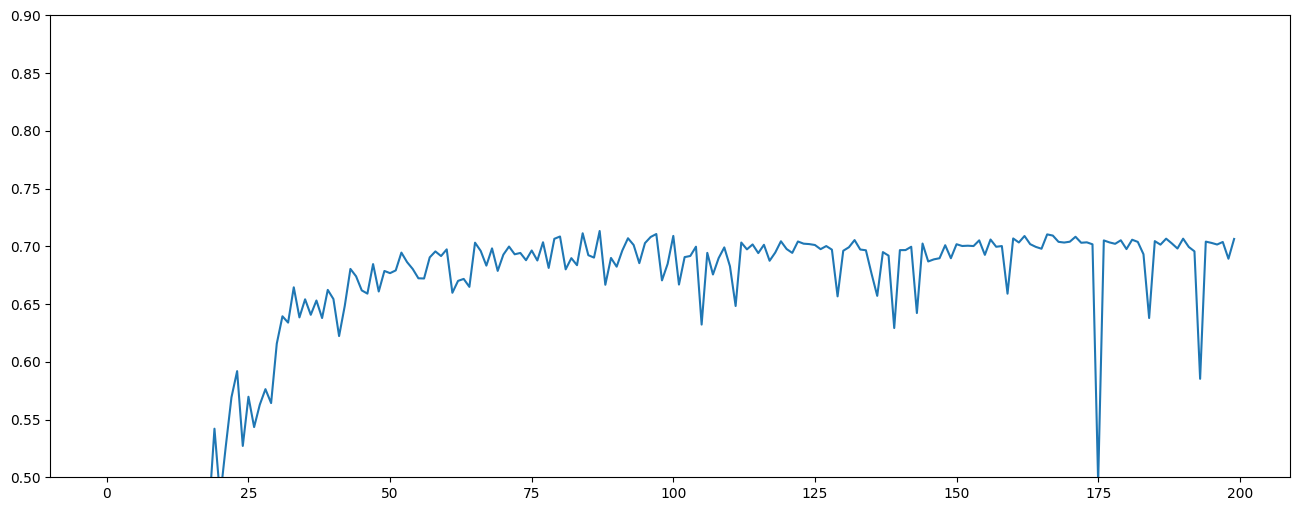

In [ ]:
plt.figure(figsize=(16.0, 6.0))
plt.plot(range(200), test_accuracy_history)

plt.ylim(0.5, 0.9)

In [ ]:
batch_size = 2640
loss = torch.nn.CrossEntropyLoss()
lenet = Lenet2().to(device)
optimizer = torch.optim.RMSprop(lenet.parameters(), lr=0.001)
test_accuracy_history = []

for epoch in bar(range(200), desc = 'learning'):
  order = np.random.permutation(len(train_data))

  for start_index in range(0, len(train_data), batch_size):
    optimizer.zero_grad()

    batch_indexes = order[start_index:start_index+batch_size]

    data_batch = train_data[batch_indexes].to(device)
    label_batch = train_labels[batch_indexes].to(device)

    preds = lenet.forward(data_batch)

    loss_val = loss(preds, label_batch)
    loss_val.backward()

    optimizer.step()

  with torch.no_grad():
    test_preds = lenet.forward(test_data)
    test_accuracy = (test_preds.argmax(dim=1)==test_labels).float().mean().data.cpu()
    test_accuracy_history.append(test_accuracy)

<ipython-input-17-72e9c02e7df9>:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in bar(range(200), desc = 'learning'):


learning:   0%|          | 0/200 [00:00<?, ?it/s]

(0.65, 0.75)

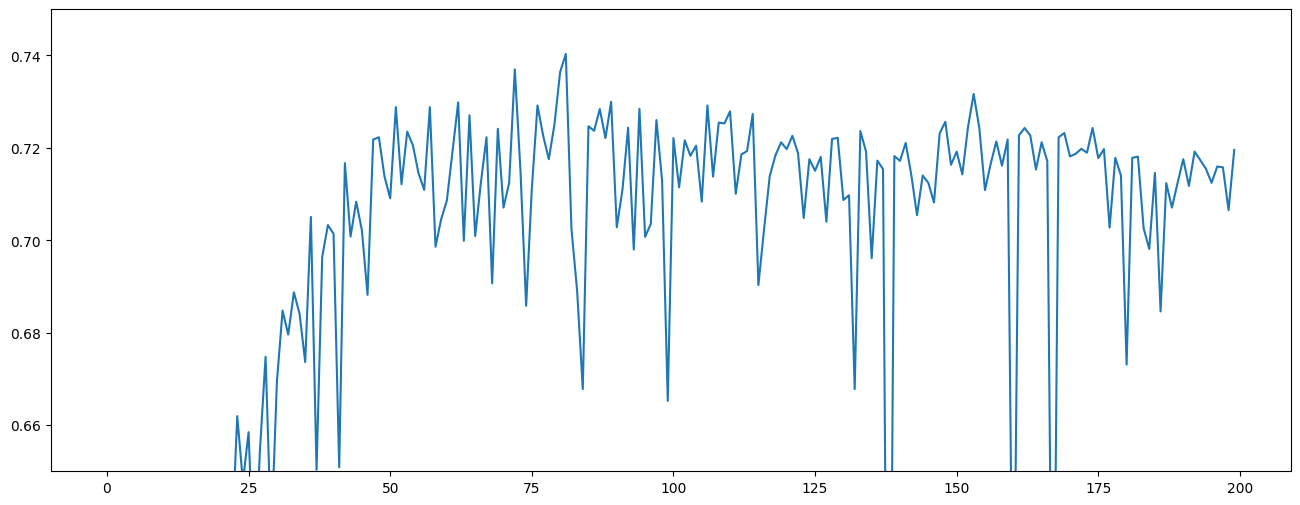

In [ ]:
plt.figure(figsize=(16.0, 6.0))
plt.plot(range(200), test_accuracy_history)

plt.ylim(0.65, 0.75)

In [ ]:
nets = [Lenet1, Lenet2]

for net in bar(range(2), desc = 'nets'):
  accuracy_net = []
  for experiment in bar(range(14), desc = 'sample eperimnet'):

    loss = torch.nn.CrossEntropyLoss()
    lenet = nets[net]().to(device)
    optimizer = torch.optim.RMSprop(lenet.parameters(), lr=0.001)
    batch_size = 2640

    for epoch in range(80):
      order = np.random.permutation(len(train_data))

      for start_index in range(0, len(train_data), batch_size):
        optimizer.zero_grad()

        batch_indexes = order[start_index:start_index+batch_size]

        data_batch = train_data[batch_indexes]
        labels_batch= train_labels[batch_indexes]

        preds = lenet.forward(data_batch)

        loss_val = loss(preds, labels_batch)
        loss_val.backward()

        optimizer.step()
    with torch.no_grad():
      test_preds = lenet.forward(test_data)
      accuracy = (test_preds.argmax(dim=1)==test_labels).float().mean().data.cpu()
      accuracy_net.append(accuracy)
    print(accuracy)
  print(f'accuracy of {net+1} net:')
  print(*accuracy_net)

<ipython-input-21-2c97bcf52979>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for net in bar(range(2), desc = 'nets'):


nets:   0%|          | 0/2 [00:00<?, ?it/s]

<ipython-input-21-2c97bcf52979>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for experiment in bar(range(14), desc = 'sample eperimnet'):


sample eperimnet:   0%|          | 0/14 [00:00<?, ?it/s]

tensor(0.7046)
tensor(0.7305)
tensor(0.6504)
tensor(0.0499)
tensor(0.6913)
tensor(0.7182)
tensor(0.6955)
tensor(0.7077)
tensor(0.7093)
tensor(0.7099)
tensor(0.6952)
tensor(0.0499)
tensor(0.7295)
tensor(0.6744)
accuracy of 1 net:
tensor(0.7046) tensor(0.7305) tensor(0.6504) tensor(0.0499) tensor(0.6913) tensor(0.7182) tensor(0.6955) tensor(0.7077) tensor(0.7093) tensor(0.7099) tensor(0.6952) tensor(0.0499) tensor(0.7295) tensor(0.6744)


sample eperimnet:   0%|          | 0/14 [00:00<?, ?it/s]

tensor(0.5784)
tensor(0.6794)
tensor(0.7262)
tensor(0.7011)
tensor(0.6807)
tensor(0.7085)
tensor(0.7239)
tensor(0.7041)
tensor(0.7053)
tensor(0.6866)
tensor(0.7059)
tensor(0.7216)
tensor(0.6918)


In [ ]:
sample1 = 'tensor(0.7046) tensor(0.7305) tensor(0.6504) tensor(0.0499) tensor(0.6913) tensor(0.7182) tensor(0.6955) tensor(0.7077) tensor(0.7093) tensor(0.7099) tensor(0.6952) tensor(0.0499) tensor(0.7295) tensor(0.6744)'
sample2 = '''tensor(0.5784)
tensor(0.6794)
tensor(0.7262)
tensor(0.7011)
tensor(0.6807)
tensor(0.7085)
tensor(0.7239)
tensor(0.7041)
tensor(0.7053)
tensor(0.6866)
tensor(0.7059)
tensor(0.7216)
tensor(0.6918)'''

In [ ]:
samples = [sample1, sample2]
for i in range(len(samples)):
  samples[i] = samples[i].replace("tensor(", '')
  samples[i] = samples[i].replace(')', '')
  samples[i] = samples[i].replace('\n', ' ')
  samples[i] = [float(j) for j in samples[i].split(" ")]

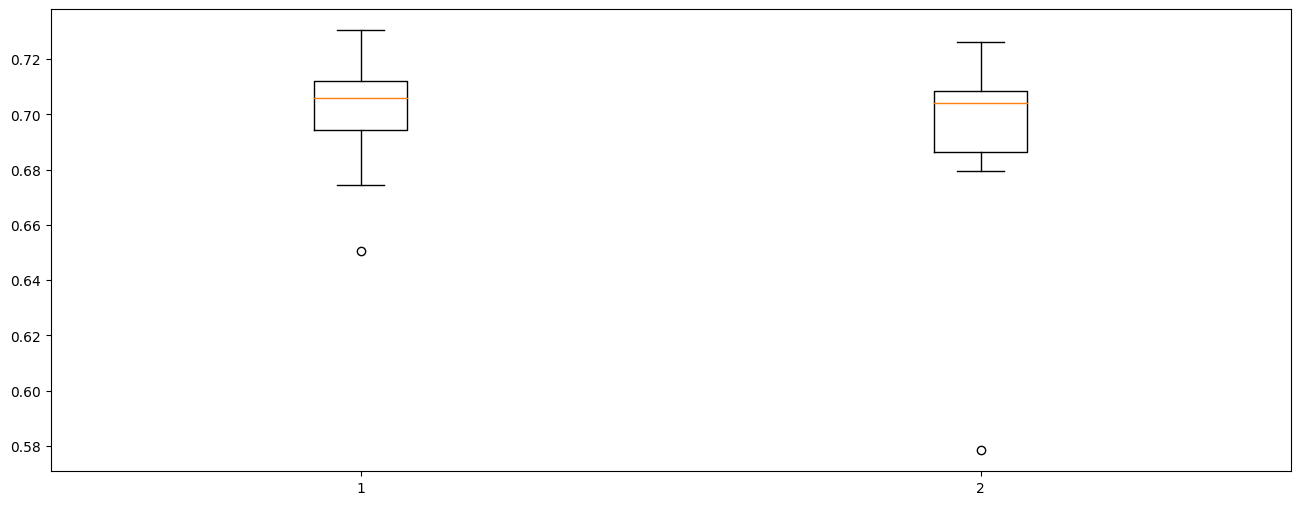

In [ ]:
plt.figure(figsize = (16., 6.))
plt.boxplot(samples)
plt.show()

In [ ]:
import scipy.stats as stats

In [ ]:
t_stat, p_val = stats.ttest_ind(samples[0], samples[1])
p_val#2

0.8479615802182173

#Resches of different activation function

In [ ]:
class Lenet2(torch.nn.Module):
  def __init__(self,act):
    super(Lenet2, self).__init__()
    self.conv1 = torch.nn.Conv2d(in_channels=1, out_channels=4, kernel_size=3, padding=1)
    self.act1 = act()
    self.conv2 = torch.nn.Conv2d(in_channels=4, out_channels=4, kernel_size=3, padding=1)
    self.act2 = act()
    self.conv3 = torch.nn.Conv2d(in_channels=4, out_channels=6, kernel_size=3, padding=1)
    self.act3 = act()
    self.conv4 = torch.nn.Conv2d(in_channels=6, out_channels=6, kernel_size=3, padding=1)
    self.act4 = act()
    self.pool1 = torch.nn.MaxPool2d(kernel_size=2, stride=2)
    self.act5 = act()
    self.conv5 = torch.nn.Conv2d(in_channels=6, out_channels=12, kernel_size=3, padding=0)
    self.act6 = act()
    self.conv6 = torch.nn.Conv2d(in_channels=12, out_channels=12, kernel_size=3, padding=1)
    self.act7 = act()
    self.conv7 = torch.nn.Conv2d(in_channels=12, out_channels=16, kernel_size=3, padding=0)
    self.act8 = act()
    self.conv8 = torch.nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, padding=1)
    self.act9 = act()
    self.pool2 = torch.nn.MaxPool2d(kernel_size=2, stride=2)
    self.act10 = act()
    self.fc1 = torch.nn.Linear(16*5*5, 120)
    self.act11 = act()
    self.fc2 = torch.nn.Linear(120, 84)
    self.act12 = act()
    self.fc3 = torch.nn.Linear(84, 35)

  def forward(self, x):
    x = self.conv1(x)
    x = self.act1(x)
    skipConn1 = x

    x = self.conv2(x)
    x = self.act2(x)
    x = torch.add(skipConn1, x)

    x = self.conv3(x)
    x = self.act3(x)
    skipConn2 = x

    x = self.conv4(x)
    x = self.act4(x)
    x = torch.add(skipConn2, x)

    x = self.pool1(x)
    x = self.act5(x)
    x = self.conv5(x)
    x = self.act6(x)
    skipConn3 = x
    x = self.conv6(x)
    x = self.act7(x)
    x = torch.add(x, skipConn3)
    x = self.conv7(x)
    x = self.act8(x)
    skipConn4 = x

    x = self.conv8(x)
    x = self.act9(x)
    x = torch.add(skipConn4, x)

    x = self.pool2(x)
    x = self.act10(x)
    x = x.view(x.size(0), x.size(1)*x.size(2)*x.size(3))
    x = self.fc1(x)
    x = self.act11(x)
    x = self.fc2(x)
    x = self.act12(x)
    x = self.fc3(x)
    return x

In [ ]:
act = [torch.nn.ELU, torch.nn.LeakyReLU, torch.nn.PReLU, torch.nn.ReLU, torch.nn.ReLU6, torch.nn.SELU, torch.nn.Tanh]

In [ ]:


for actt in bar(range(7), desc = 'act'):
  accuracy_net = []
  for experiment in bar(range(14), desc = 'sample eperimnet'):

    loss = torch.nn.CrossEntropyLoss()
    lenet = Lenet2(act[actt]).to(device)
    optimizer = torch.optim.RMSprop(lenet.parameters(), lr=0.001)
    batch_size = 2640

    for epoch in range(80):
      order = np.random.permutation(len(train_data))

      for start_index in range(0, len(train_data), batch_size):
        optimizer.zero_grad()

        batch_indexes = order[start_index:start_index+batch_size]

        data_batch = train_data[batch_indexes]
        labels_batch= train_labels[batch_indexes]

        preds = lenet.forward(data_batch)

        loss_val = loss(preds, labels_batch)
        loss_val.backward()

        optimizer.step()
    with torch.no_grad():
      test_preds = lenet.forward(test_data)
      accuracy = (test_preds.argmax(dim=1)==test_labels).float().mean().data.cpu()
      accuracy_net.append(accuracy)
    print(accuracy)
  print(f'accuracy of {act} act:')
  print(*accuracy_net)

<ipython-input-49-b5d043f53773>:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for actt in bar(range(7), desc = 'act'):


act:   0%|          | 0/7 [00:00<?, ?it/s]

<ipython-input-49-b5d043f53773>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for experiment in bar(range(14), desc = 'sample eperimnet'):


sample eperimnet:   0%|          | 0/14 [00:00<?, ?it/s]

tensor(0.7222)
tensor(0.3425)
tensor(0.6825)
tensor(0.7242)
tensor(0.7219)
tensor(0.7246)
tensor(0.7203)
tensor(0.7098)
tensor(0.7227)
tensor(0.7071)
tensor(0.7277)
tensor(0.7214)
tensor(0.7053)
tensor(0.7125)


TypeError: ignored

act func 1

tensor(0.7222)
tensor(0.3425)
tensor(0.6825)
tensor(0.7242)
tensor(0.7219)
tensor(0.7246)
tensor(0.7203)
tensor(0.7098)
tensor(0.7227)
tensor(0.7071)
tensor(0.7277)
tensor(0.7214)
tensor(0.7053)
tensor(0.7125)

act func 2
tensor(0.7260) tensor(0.7299) tensor(0.7245) tensor(0.7224) tensor(0.7416) tensor(0.7419) tensor(0.7252) tensor(0.7272) tensor(0.7135) tensor(0.7165) tensor(0.7043) tensor(0.6844) tensor(0.7291) tensor(0.7056)

act func 3
tensor(0.6865) tensor(0.6832) tensor(0.6905) tensor(0.7140) tensor(0.7144) tensor(0.6978) tensor(0.6848) tensor(0.7098) tensor(0.7048) tensor(0.6666) tensor(0.6942) tensor(0.7219) tensor(0.7098) tensor(0.5254)


In [ ]:


for actt in bar(range(1, 7), desc = 'act'):
  accuracy_net = []
  for experiment in bar(range(14), desc = 'sample eperimnet'):

    loss = torch.nn.CrossEntropyLoss()
    lenet = Lenet2(act[actt]).to(device)
    optimizer = torch.optim.RMSprop(lenet.parameters(), lr=0.001)
    batch_size = 2640

    for epoch in range(80):
      order = np.random.permutation(len(train_data))

      for start_index in range(0, len(train_data), batch_size):
        optimizer.zero_grad()

        batch_indexes = order[start_index:start_index+batch_size]

        data_batch = train_data[batch_indexes]
        labels_batch= train_labels[batch_indexes]

        preds = lenet.forward(data_batch)

        loss_val = loss(preds, labels_batch)
        loss_val.backward()

        optimizer.step()
    with torch.no_grad():
      test_preds = lenet.forward(test_data)
      accuracy = (test_preds.argmax(dim=1)==test_labels).float().mean().data.cpu()
      accuracy_net.append(accuracy)
    print(accuracy)
  print(f'accuracy of {act} act:')
  print(*accuracy_net)

<ipython-input-50-82114ea42ee5>:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for actt in bar(range(1, 7), desc = 'act'):


act:   0%|          | 0/6 [00:00<?, ?it/s]

<ipython-input-50-82114ea42ee5>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for experiment in bar(range(14), desc = 'sample eperimnet'):


sample eperimnet:   0%|          | 0/14 [00:00<?, ?it/s]

tensor(0.7260)
tensor(0.7299)
tensor(0.7245)
tensor(0.7224)
tensor(0.7416)
tensor(0.7419)
tensor(0.7252)
tensor(0.7272)
tensor(0.7135)
tensor(0.7165)
tensor(0.7043)
tensor(0.6844)
tensor(0.7291)
tensor(0.7056)
accuracy of [<class 'torch.nn.modules.activation.ELU'>, <class 'torch.nn.modules.activation.LeakyReLU'>, <class 'torch.nn.modules.activation.PReLU'>, <class 'torch.nn.modules.activation.ReLU'>, <class 'torch.nn.modules.activation.ReLU6'>, <class 'torch.nn.modules.activation.SELU'>, <class 'torch.nn.modules.activation.Tanh'>] act:
tensor(0.7260) tensor(0.7299) tensor(0.7245) tensor(0.7224) tensor(0.7416) tensor(0.7419) tensor(0.7252) tensor(0.7272) tensor(0.7135) tensor(0.7165) tensor(0.7043) tensor(0.6844) tensor(0.7291) tensor(0.7056)


sample eperimnet:   0%|          | 0/14 [00:00<?, ?it/s]

tensor(0.6865)
tensor(0.6832)
tensor(0.6905)
tensor(0.7140)
tensor(0.7144)
tensor(0.6978)
tensor(0.6848)
tensor(0.7098)
tensor(0.7048)
tensor(0.6666)
tensor(0.6942)
tensor(0.7219)
tensor(0.7098)
tensor(0.5254)
accuracy of [<class 'torch.nn.modules.activation.ELU'>, <class 'torch.nn.modules.activation.LeakyReLU'>, <class 'torch.nn.modules.activation.PReLU'>, <class 'torch.nn.modules.activation.ReLU'>, <class 'torch.nn.modules.activation.ReLU6'>, <class 'torch.nn.modules.activation.SELU'>, <class 'torch.nn.modules.activation.Tanh'>] act:
tensor(0.6865) tensor(0.6832) tensor(0.6905) tensor(0.7140) tensor(0.7144) tensor(0.6978) tensor(0.6848) tensor(0.7098) tensor(0.7048) tensor(0.6666) tensor(0.6942) tensor(0.7219) tensor(0.7098) tensor(0.5254)


sample eperimnet:   0%|          | 0/14 [00:00<?, ?it/s]

tensor(0.7152)
tensor(0.6820)
tensor(0.7213)
tensor(0.7216)
tensor(0.6879)
tensor(0.7084)
tensor(0.7245)
tensor(0.7213)
tensor(0.0499)
tensor(0.7058)
tensor(0.7300)
tensor(0.7212)
tensor(0.7076)
tensor(0.6932)
accuracy of [<class 'torch.nn.modules.activation.ELU'>, <class 'torch.nn.modules.activation.LeakyReLU'>, <class 'torch.nn.modules.activation.PReLU'>, <class 'torch.nn.modules.activation.ReLU'>, <class 'torch.nn.modules.activation.ReLU6'>, <class 'torch.nn.modules.activation.SELU'>, <class 'torch.nn.modules.activation.Tanh'>] act:
tensor(0.7152) tensor(0.6820) tensor(0.7213) tensor(0.7216) tensor(0.6879) tensor(0.7084) tensor(0.7245) tensor(0.7213) tensor(0.0499) tensor(0.7058) tensor(0.7300) tensor(0.7212) tensor(0.7076) tensor(0.6932)


sample eperimnet:   0%|          | 0/14 [00:00<?, ?it/s]

tensor(0.7314)
tensor(0.7435)
tensor(0.7031)
tensor(0.7191)
tensor(0.7324)
tensor(0.7138)
tensor(0.7371)
tensor(0.7042)
tensor(0.7429)
tensor(0.7172)
tensor(0.7059)
tensor(0.7154)
tensor(0.7208)
tensor(0.7336)
accuracy of [<class 'torch.nn.modules.activation.ELU'>, <class 'torch.nn.modules.activation.LeakyReLU'>, <class 'torch.nn.modules.activation.PReLU'>, <class 'torch.nn.modules.activation.ReLU'>, <class 'torch.nn.modules.activation.ReLU6'>, <class 'torch.nn.modules.activation.SELU'>, <class 'torch.nn.modules.activation.Tanh'>] act:
tensor(0.7314) tensor(0.7435) tensor(0.7031) tensor(0.7191) tensor(0.7324) tensor(0.7138) tensor(0.7371) tensor(0.7042) tensor(0.7429) tensor(0.7172) tensor(0.7059) tensor(0.7154) tensor(0.7208) tensor(0.7336)


sample eperimnet:   0%|          | 0/14 [00:00<?, ?it/s]

tensor(0.7174)
tensor(0.7115)
tensor(0.7257)
tensor(0.7185)
tensor(0.7110)
tensor(0.7188)
tensor(0.6958)
tensor(0.7168)
tensor(0.7302)
tensor(0.7088)
tensor(0.7308)
tensor(0.7098)
tensor(0.7018)
tensor(0.7012)
accuracy of [<class 'torch.nn.modules.activation.ELU'>, <class 'torch.nn.modules.activation.LeakyReLU'>, <class 'torch.nn.modules.activation.PReLU'>, <class 'torch.nn.modules.activation.ReLU'>, <class 'torch.nn.modules.activation.ReLU6'>, <class 'torch.nn.modules.activation.SELU'>, <class 'torch.nn.modules.activation.Tanh'>] act:
tensor(0.7174) tensor(0.7115) tensor(0.7257) tensor(0.7185) tensor(0.7110) tensor(0.7188) tensor(0.6958) tensor(0.7168) tensor(0.7302) tensor(0.7088) tensor(0.7308) tensor(0.7098) tensor(0.7018) tensor(0.7012)


sample eperimnet:   0%|          | 0/14 [00:00<?, ?it/s]

tensor(0.6841)
tensor(0.6729)
tensor(0.6992)
tensor(0.6867)
tensor(0.6971)
tensor(0.6818)
tensor(0.7093)
tensor(0.6978)
tensor(0.6956)
tensor(0.6928)
tensor(0.6815)
tensor(0.7012)
tensor(0.7037)
tensor(0.7057)
accuracy of [<class 'torch.nn.modules.activation.ELU'>, <class 'torch.nn.modules.activation.LeakyReLU'>, <class 'torch.nn.modules.activation.PReLU'>, <class 'torch.nn.modules.activation.ReLU'>, <class 'torch.nn.modules.activation.ReLU6'>, <class 'torch.nn.modules.activation.SELU'>, <class 'torch.nn.modules.activation.Tanh'>] act:
tensor(0.6841) tensor(0.6729) tensor(0.6992) tensor(0.6867) tensor(0.6971) tensor(0.6818) tensor(0.7093) tensor(0.6978) tensor(0.6956) tensor(0.6928) tensor(0.6815) tensor(0.7012) tensor(0.7037) tensor(0.7057)


In [2]:
sample1 = 'tensor(0.7222) tensor(0.3425) tensor(0.6825) tensor(0.7242) tensor(0.7219) tensor(0.7246) tensor(0.7203) tensor(0.7098) tensor(0.7227) tensor(0.7071) tensor(0.7277) tensor(0.7214) tensor(0.7053) tensor(0.7125)'
sample2 = 'tensor(0.7260) tensor(0.7299) tensor(0.7245) tensor(0.7224) tensor(0.7416) tensor(0.7419) tensor(0.7252) tensor(0.7272) tensor(0.7135) tensor(0.7165) tensor(0.7043) tensor(0.6844) tensor(0.7291) tensor(0.7056)'
sample3 = 'tensor(0.6865) tensor(0.6832) tensor(0.6905) tensor(0.7140) tensor(0.7144) tensor(0.6978) tensor(0.6848) tensor(0.7098) tensor(0.7048) tensor(0.6666) tensor(0.6942) tensor(0.7219) tensor(0.7098) tensor(0.5254)'
sample4 = 'tensor(0.7152) tensor(0.6820) tensor(0.7213) tensor(0.7216) tensor(0.6879) tensor(0.7084) tensor(0.7245) tensor(0.7213) tensor(0.0499) tensor(0.7058) tensor(0.7300) tensor(0.7212) tensor(0.7076) tensor(0.6932)'
sample5 = 'tensor(0.7314) tensor(0.7435) tensor(0.7031) tensor(0.7191) tensor(0.7324) tensor(0.7138) tensor(0.7371) tensor(0.7042) tensor(0.7429) tensor(0.7172) tensor(0.7059) tensor(0.7154) tensor(0.7208) tensor(0.7336)'
sample6 = 'tensor(0.7174) tensor(0.7115) tensor(0.7257) tensor(0.7185) tensor(0.7110) tensor(0.7188) tensor(0.6958) tensor(0.7168) tensor(0.7302) tensor(0.7088) tensor(0.7308) tensor(0.7098) tensor(0.7018) tensor(0.7012)'
sample7 = 'tensor(0.6841) tensor(0.6729) tensor(0.6992) tensor(0.6867) tensor(0.6971) tensor(0.6818) tensor(0.7093) tensor(0.6978) tensor(0.6956) tensor(0.6928) tensor(0.6815) tensor(0.7012) tensor(0.7037) tensor(0.7057)'

In [3]:
samples = [sample1, sample2, sample3, sample4, sample5, sample6, sample7]
for i in range(len(samples)):
  samples[i] = samples[i].replace("tensor(", '')
  samples[i] = samples[i].replace(')', '')
  samples[i] = [float(j) for j in samples[i].split(" ")]

{'whiskers': [<matplotlib.lines.Line2D at 0x7f195570a4a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f195570a9e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f195570a200>,
 'medians': [<matplotlib.lines.Line2D at 0x7f195570af20>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f195570b1f0>,
 'means': []}

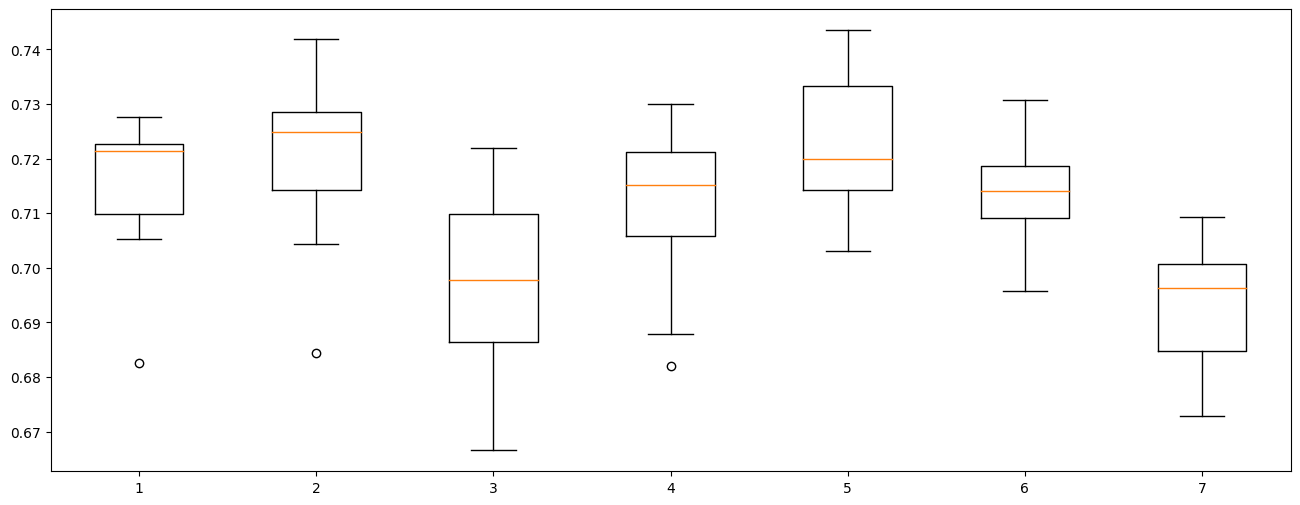

In [15]:
plt.figure(figsize = (16., 6.))
plt.boxplot(samples)

In [14]:
samples[2].pop(-1)

0.5254

In [17]:
import scipy.stats as stats

In [18]:
t_stat, p_val = stats.ttest_ind(samples[0], samples[1])
p_val

0.33127901894562795

In [19]:
t_stat, p_val = stats.ttest_ind(samples[2], samples[1])
p_val

0.0009025200032591763

In [20]:
t_stat, p_val = stats.ttest_ind(samples[3], samples[1])
p_val

0.096522087675991

In [21]:
t_stat, p_val = stats.ttest_ind(samples[4], samples[1])
p_val

0.7174610858110217

In [22]:
t_stat, p_val = stats.ttest_ind(samples[4], samples[5])
p_val

0.07278856455326149

In [23]:
t_stat, p_val = stats.ttest_ind(samples[4], samples[6])
p_val

1.243105491670942e-06

Relu6 лучшая функция активации по графику